## Problem Statement

It is a classification problem where we have to predict whether a loan would be approved or not. In a classification problem, we have to predict discrete values based on a given set of independent variables.

Loan prediction is a very common real-life problem that each retail bank faces atleast once in its lifetime. If done correctly, it can save a lot of man hours at the end of a retail bank.

### Hypothesis generation 
This involves understaning the problem in details by brainstormingg as many factors as possible, which can impact the outcome. It is done by understanding the problem statement thoroughly and before looking at the data. 

Below are some of the factors which I think can affect the Loan Approval( dependent variable for this loan prediction problem):
- **Marital Status:** Married applicants are more likely to be approved due to dual-income households or perceived stability.
- **Income:** Applicants with higher incomes are more likely to be approved, as they demonstrate stronger repayment capacity.
- **Marital Status:** Married applicants are more likely to be approved due to dual-income households or perceived stability.
- **Loan Term:** Short-term loans (e.g., <5 years) are approved more often than long-term loans.
- **Loan Amount:** Larger loan amounts relative to income decrease approval likelihood due to higher risk.
- **Dependents:** Applicants with fewer dependents are more likely to be approved, as more dependents may strain finances.
- **Past Defaults:** Applicants with no history of loan defaults are more likely to be approved.

In [220]:
!pip install seaborn

In [221]:
#let's import the necessary libaries
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

import warnings 
warnings.filterwarnings('ignore')

In [222]:
#let's import the dataset
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [223]:
#we'll view the first 5 rows of the train datasets
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [224]:
train_df.dtypes #let's print dtypes for each variables

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We can see three formats of data types:

- Object: Object format means variables are categorical.
- int64: It represents the integral variables.
- float64: It represents the variables which have some decimal values involved. They are also numerical variables.

In [225]:
test_df.shape #let's view the shape of the test datasets

(367, 12)

In [226]:
#let's drop 'Loan_ID' column from the datasets
train_df=train_df.drop(columns=['Loan_ID'], axis=1)

In [227]:
#let's do the same for the test datasets
test_df=test_df.drop(columns=['Loan_ID'], axis=1)

In [228]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [229]:
#let's check for info
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [230]:
#let's check for missing values
train_df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### EDA
**Univariate Analysis** This is the simplest form of analyzing data, where we examine each variable individually. For categorical features, we can use frequency table or bar plot, which will calculate the number of each category in a particular variable. For numerical features, probability density plots can be used to look at the distribution of the variable.

Target variable: we'll look at the target variable, i.e. Loan_Status. As it is a categorical variable, let's view its frequency table, percentage distribution of the variable.

In [231]:
#Frequecncy table of the variable will give us the count of each category in that varaible.
train_df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [232]:
#normalize can be set to True to print proportions, instead of numbers.
train_df['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

the loan of 442(of around 69%) people out 614 was approved

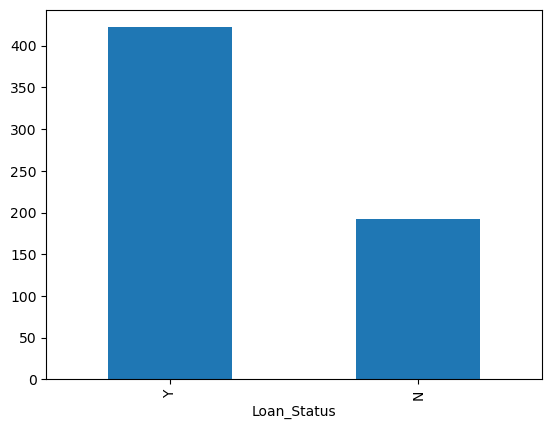

In [233]:
train_df['Loan_Status'].value_counts().plot(kind='bar', xlabel='Loan_Status')
plt.show()

let's visualize each variable separately. Different types of variables are categorical, ordinal and numerical.

- categorical features: these features are categorical (Gender, Married, Self_Employed, Credit_History, Loan_Status).
- ordinal features: variables in categoorical features having some order involved (Dependents, Education, Property_Area).
- numerical features: these are features that have numeriacal values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term).

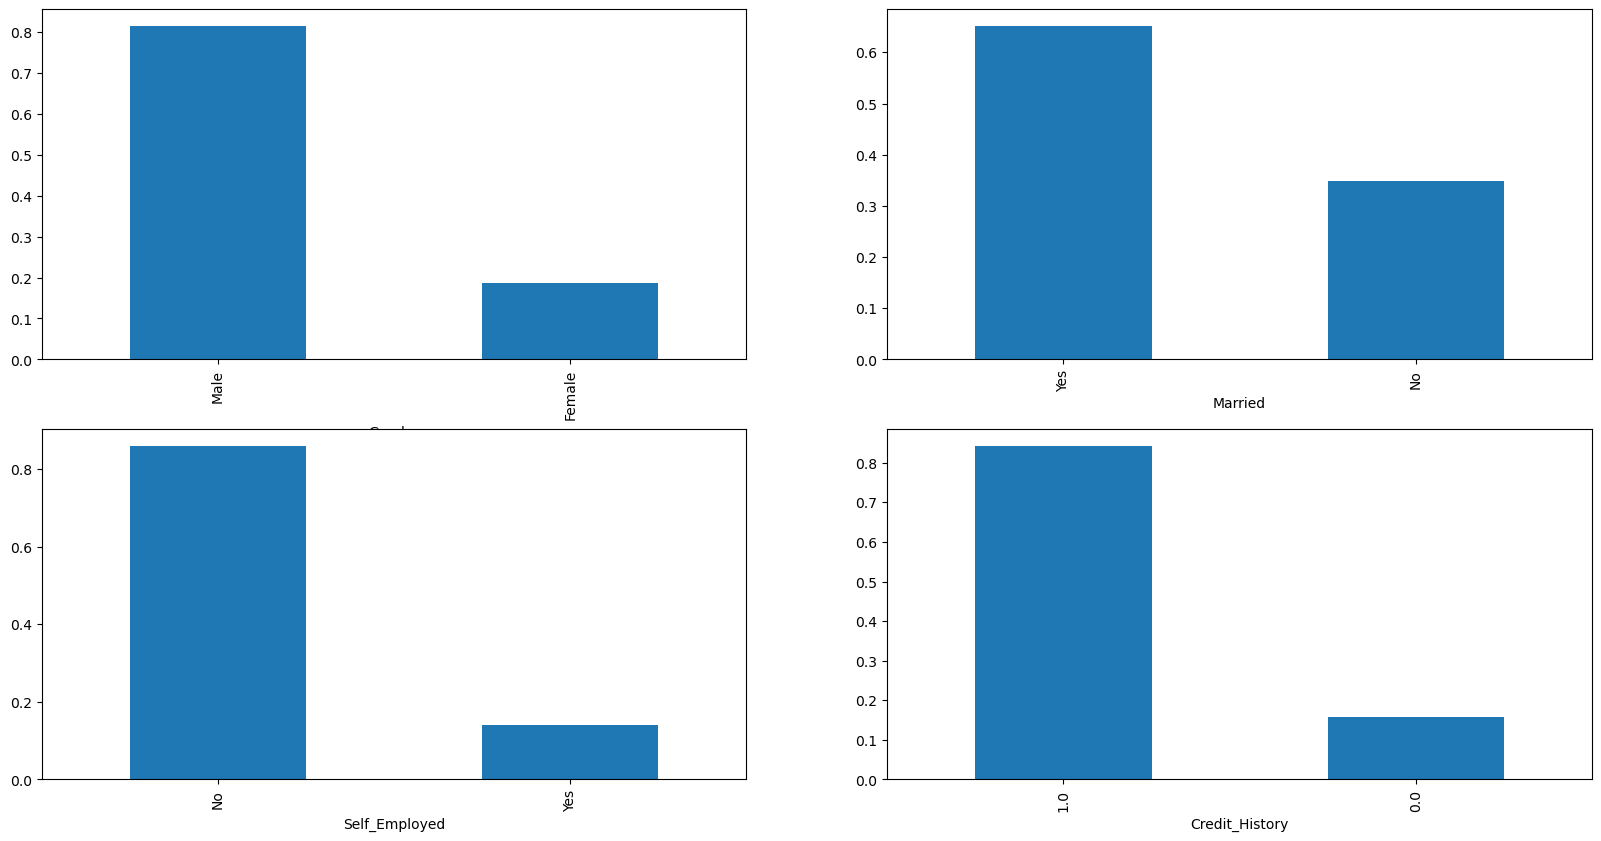

In [234]:
#INDEPENDENT VARIABLES (CATEGORICAL)
plt.figure(1) 
plt.subplot(221)
train_df['Gender'].value_counts(normalize=True).plot(figsize=(20,10), kind='bar', xlabel='Gender')

plt.subplot(222)
train_df['Married'].value_counts(normalize=True).plot(kind='bar', xlabel='Married')

plt.subplot(223)
train_df['Self_Employed'].value_counts(normalize=True).plot(kind='bar', xlabel='Self_Employed')

plt.subplot(224)
train_df['Credit_History'].value_counts(normalize=True).plot(kind='bar', xlabel='Credit_History')
plt.show()

Based on the information above:

- 80% applicants of the applicants are male.
- around 65% applicants in the dataset are married.
- around 15% applicants in the dataset are self-employed.
- around 85% applicants have repaid their debts.

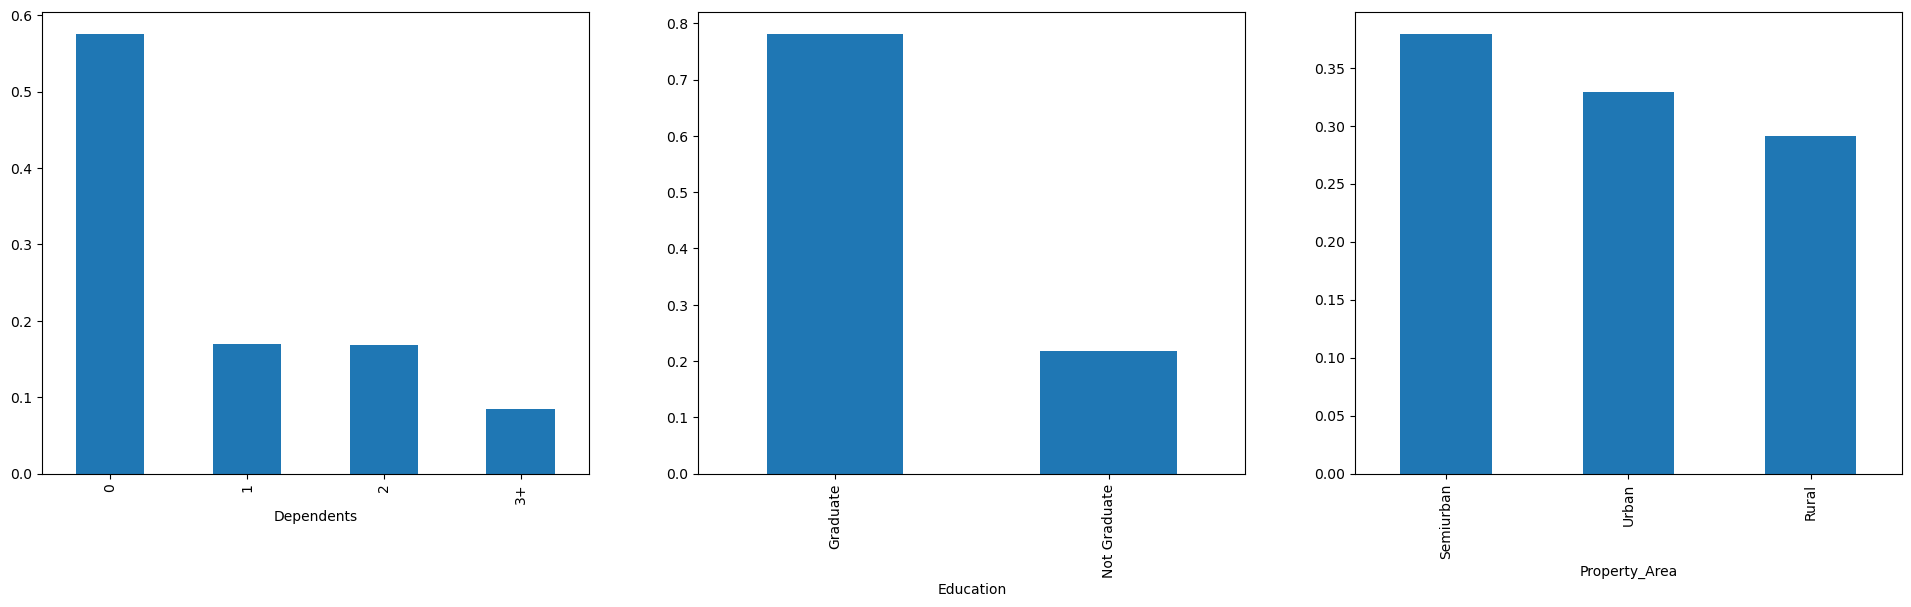

In [235]:
#INDEPENDENT VARIABLES (ORDINALS)
plt.figure(1) 
plt.subplot(131)
train_df['Dependents'].value_counts(normalize=True).plot(figsize=(24,6), kind='bar', xlabel='Dependents')

plt.subplot(132)
train_df['Education'].value_counts(normalize=True).plot(kind='bar', xlabel='Education')

plt.subplot(133)
train_df['Property_Area'].value_counts(normalize=True).plot(kind='bar', xlabel='Property_Area')
plt.show()

from these, we can conclude:

- most of the applicants don't have dependents.
- most of the applicants are from semiurban.
- around 80% of the applicants are graduates.

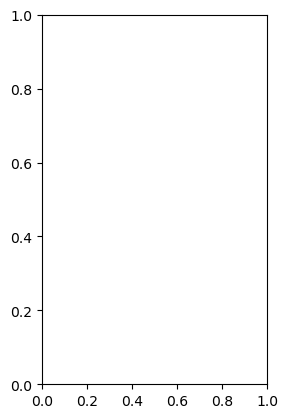

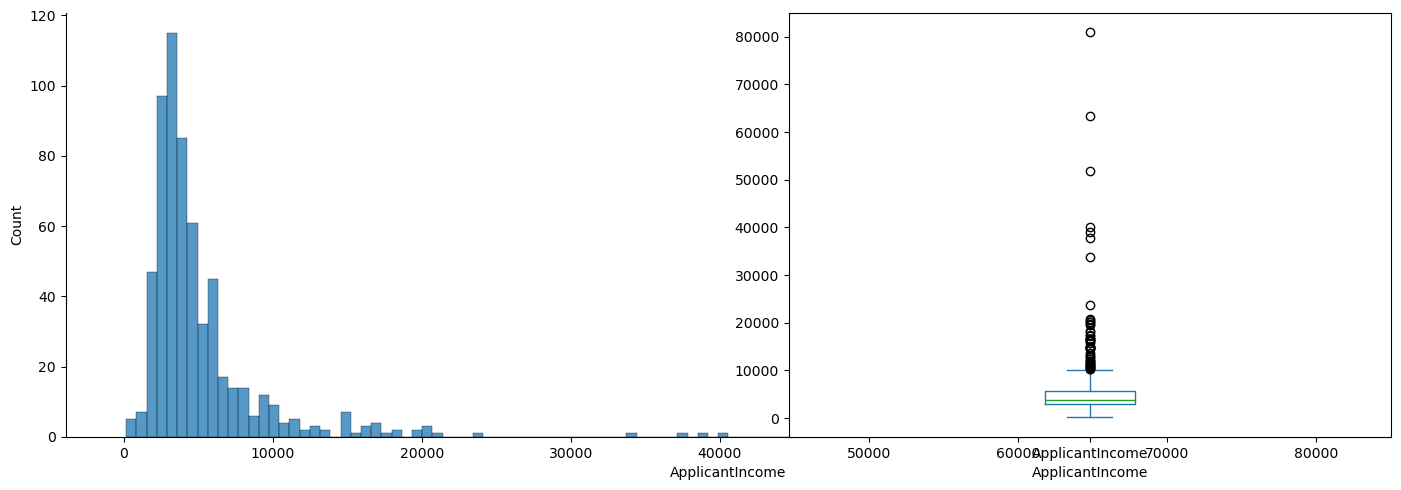

In [236]:
#INDEPENDENT VARIABLES (NUMERICAL)
#let's view the distribution of Applicant income first 
plt.figure(1)
plt.subplot(121)
sns.displot(train_df['ApplicantIncome'])

plt.subplot(122)
train_df['ApplicantIncome'].plot(kind='box', figsize=(16,5), xlabel='ApplicantIncome')
plt.show()

- this suggests that most of the data in the distribution of the applicants' income is skewed towards the left, which means it is not normally distributed.
- the boxplot confirms the presence of a lot of outliers or extreme values. This can be attributed to the income disparity in the society. Part of which can be driven by the fact that we are looking at people with different education levels.


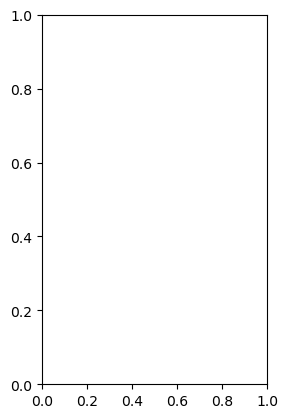

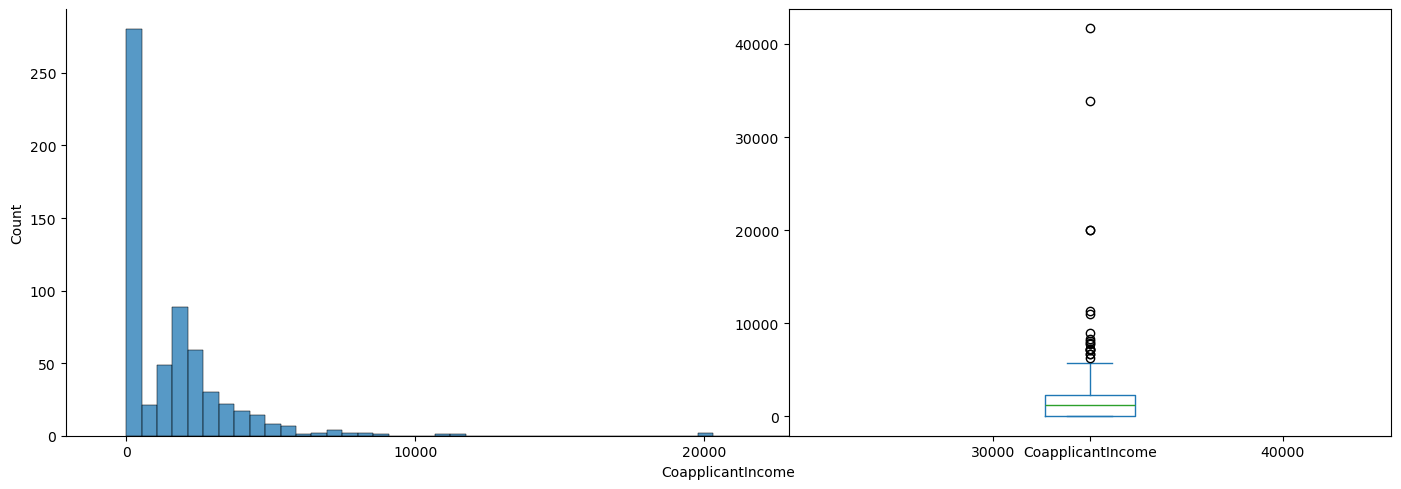

In [237]:
#let's look at the Coapplicant income distribution
plt.figure(1)
plt.subplot(121)
sns.displot(train_df['CoapplicantIncome'])

plt.subplot(122)
train_df['CoapplicantIncome'].plot(kind='box', figsize=(16,5))
plt.show()

we see a similar distination as that of the applicant income. we also see a lot of outliers in thr coapplicant income and it is not normally distributed.

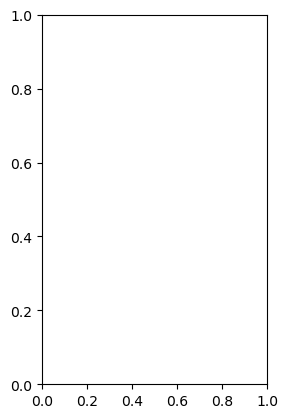

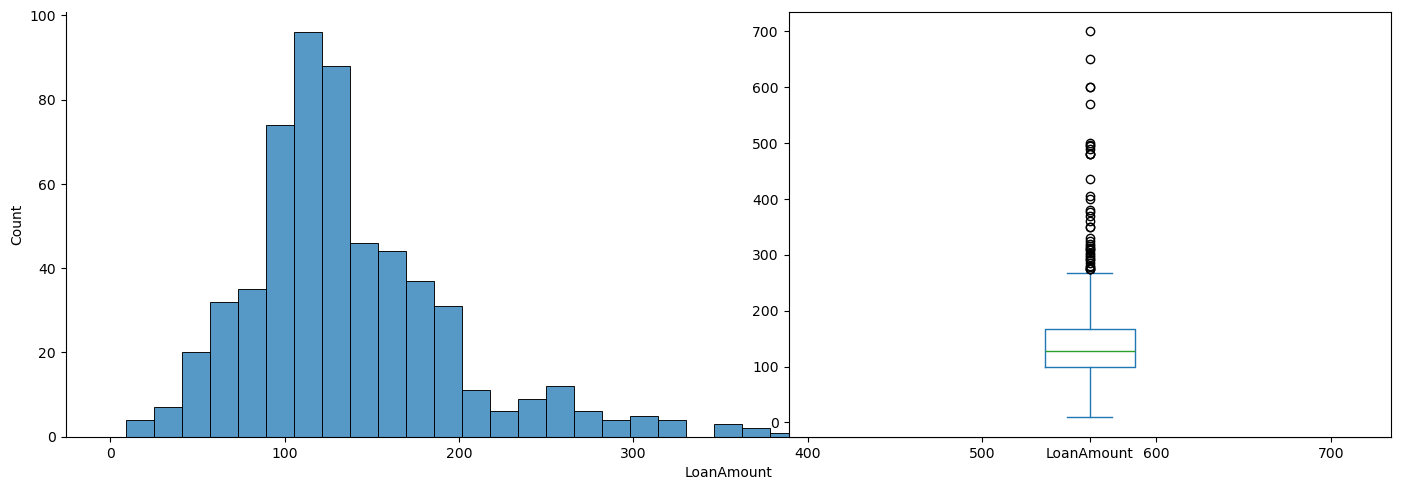

In [238]:
#let's look at the distribution of LoanAmout variable. 
plt.figure(1)
plt.subplot(121)
sns.displot(train_df['LoanAmount'])

plt.subplot(122)
train_df['LoanAmount'].plot(kind='box', figsize=(16,5))
plt.show()


we see a lot of outliers in this variable and the distribution is fairly normal.

we'd like to know how well each features correlate with Loan Status.

## Bivariate Analysis

- let's recall some of the hypothesis that we generated earlier,i.e. Applicants with higher incomes are more likely to be approved, as they demonstrate stronger repayment capacity.
- Let's try to test the above metioned hypothesis using bivariate analysis. we will now explore individual variable with respect to the target variable.

1. Categorical independent variable vs Target variable

Firstly, we'll find the relation between target variable and categorical independent variables. let us look at the stacked bar plot, which will give us the proportion of approved and unapproved loans.

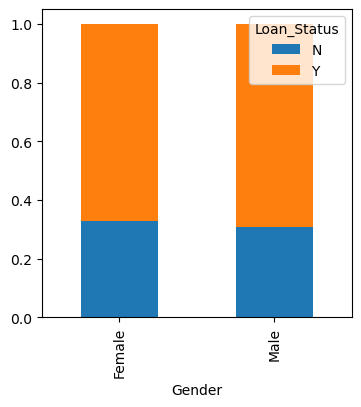

In [239]:
#let's visulize for Gender 
Gender=pd.crosstab(train_df['Gender'], train_df['Loan_Status'])

Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

- as evident from the above, that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

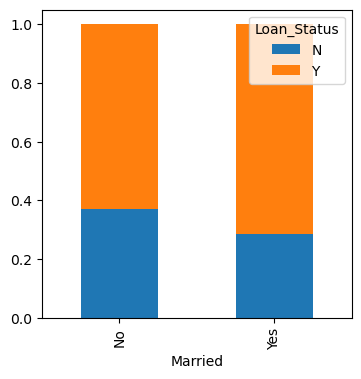

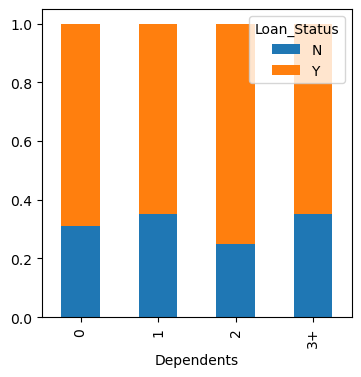

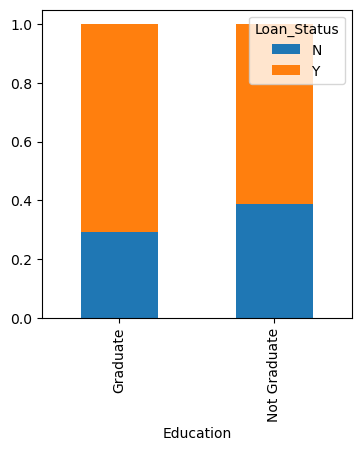

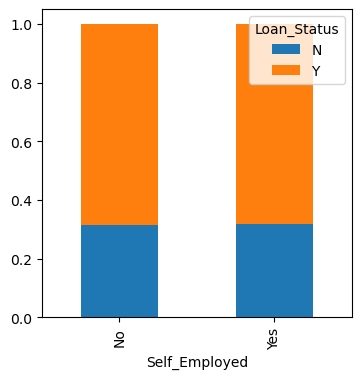

In [240]:
#let's visualize the remaining categorical variables vs target variable
Married=pd.crosstab(train_df['Married'], train_df['Loan_Status'])
Dependents=pd.crosstab(train_df['Dependents'], train_df['Loan_Status'])
Education=pd.crosstab(train_df['Education'], train_df['Loan_Status'])
Self_Employed=pd.crosstab(train_df['Self_Employed'], train_df['Loan_Status'])

Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

- proportion of married applicants is higher for the approved loans.
- distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
- there is nothing significant we can deduce from Self_Employed Vs Loan_Status plot.

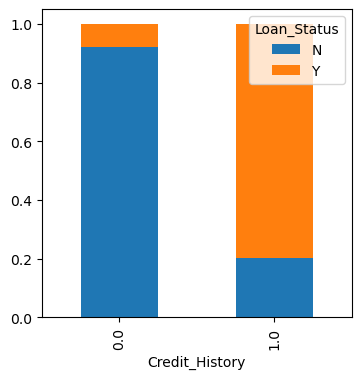

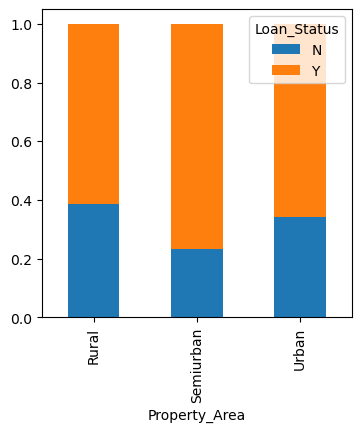

In [241]:
#let's check the relationship between remaining categorical independent variables and Loan_Status 
Credit_History=pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'])
Property_Area=pd.crosstab(train_df['Property_Area'], train_df['Loan_Status'])

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

- it seems people with credit history as 1 are more likely to get their loans approved.
- proportion of loans getting in semiurban area is higher as compared to their in rural or urban area.
  
Now, let's visualize numerical independent variables with respect to the target variable.

## Numerical independent variable vs target variable

we'll try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

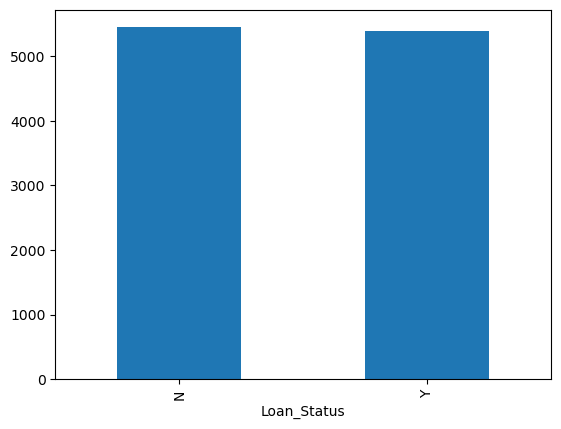

In [242]:
train_df.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()
plt.show()

- here the y-axis represents the mean applicant income. we don't see any change in the mean income. so let's make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

## Making Bins
- Alright, imagine you have a big box of different colored candies—red, blue, green, and yellow. If I asked you, "What’s the average sweetness of all the candies mixed together?" you might say, "Hmm, they’re all kinda the same sweetness." But what if we sort them into separate bowls by color first? Then, you might notice that the red candies are super sweet, the blue ones are a little sour, and the green ones are just right. By grouping them, you see differences you couldn’t spot when they were all mixed up.
- That’s what "making bins" means here. Instead of looking at all the people’s incomes at once (which makes the average seem flat), we’ll sort them into groups (like "low income," "medium income," "high income"). Then, we’ll check if people in one group (like "high income") get approved for loans more often than others. It’s like using smaller bowls to see the real story hiding in the big candy box.

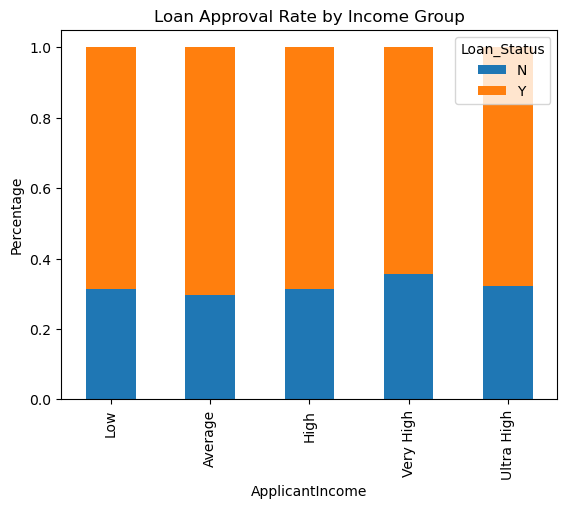

In [243]:
# Define bins and labels (with 5th bin for values >8100)
bins = [0, 2500, 4000, 6000, 8100, np.inf]
group = ['Low', 'Average', 'High', 'Very High', 'Ultra High']

# Bin the data (handle NaN)
train_df['Income_bin'] = pd.cut(
    train_df['ApplicantIncome'], 
    bins=bins, 
    labels=group,
    include_lowest=True,
    ordered=False
)

# Create a normalized crosstab
Income_bin = pd.crosstab(train_df['Income_bin'], train_df['Loan_Status'], normalize='index')
Income_bin.plot(kind='bar', stacked=True)

# Label the plot
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')
plt.title('Loan Approval Rate by Income Group')
plt.show()

- as evident from above, applicant income does not affect the chances of loan approval, which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

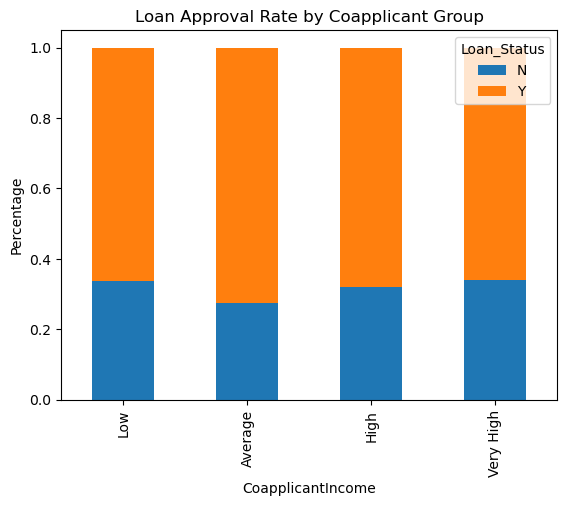

In [244]:
#let's analyze the coapplicant income and loan status variable in similar manner
# Define bins and labels (with 4th bin for values >4200)
bins = [0, 1000, 3000, 4200, np.inf]
group = ['Low', 'Average', 'High', 'Very High']

# Bin the data (handle NaN)
train_df['CoapplicantIncome_bin'] = pd.cut(
    train_df['CoapplicantIncome'], 
    bins=bins, 
    labels=group,
    include_lowest=True,
    ordered=False
)

# Create a normalized crosstab
Income_bin = pd.crosstab(train_df['CoapplicantIncome_bin'], train_df['Loan_Status'], normalize='index')
Income_bin.plot(kind='bar', stacked=True)

# Label the plot
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')
plt.title('Loan Approval Rate by Coapplicant Group')
plt.show()

- it shows that if coapplicants' income is less, the chances of loan approval are high, but this doesn't look right. The possible reason behind this may be that most of the applicants don't have any coapplicant, so the coapplicant income for such applicant is 0 and hence the loan approval is not dependent on it.

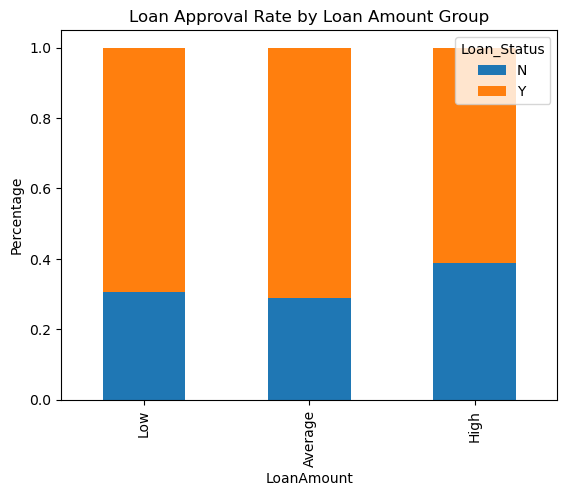

In [245]:
#let's analyze the loan amount variable in similar manner
# Define bins and labels (with 4th bin for values >4200)
bins = [0, 100, 200, 700, np.inf]
group = ['Low', 'Average', 'High', 'Very High']

# Bin the data (handle NaN)
train_df['LoanAmount_bin'] = pd.cut(
    train_df['LoanAmount'], 
    bins=bins, 
    labels=group,
    include_lowest=True,
    ordered=False
)

# Create a normalized crosstab
Income_bin = pd.crosstab(train_df['LoanAmount_bin'], train_df['Loan_Status'], normalize='index')
Income_bin.plot(kind='bar', stacked=True)

# Label the plot
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')
plt.title('Loan Approval Rate by Loan Amount Group')
plt.show()

- it can be seen that the proportion loans is higher for low and average loan amount as compared to that of high loan amount, which supports our hypothesis, in which we considered that the chances of loan approval will be high when the loan amount is less.

In [246]:
train_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,CoapplicantIncome_bin,LoanAmount_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High,Low,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,Average
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,Low,Low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,Low,Average


we'll drop the bins which we created for the exploration part. we'll change the 3+ in dependent variable to 3 to make it a numerical variable. we'll also convert the target variables categories into 1 and 0, so that we can find it's correlation with numerical variables. one more reason to do so, is few models like Logistic Regression takes only numerical values as input, we'll replace N with 0 and Y with 1.

In [247]:
train_df=train_df.drop(columns=['Income_bin', 'CoapplicantIncome_bin', 'LoanAmount_bin'], axis=1)

In [248]:
train_df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [249]:
train_df['Dependents'].replace({'0':0, '1':1, '2':2, '3+':4},inplace= True)
test_df['Dependents'].replace({'0':0, '1':1, '2':2, '3+':4},inplace= True)
train_df['Loan_Status'].replace({'N':0, 'Y':1}, inplace=True)

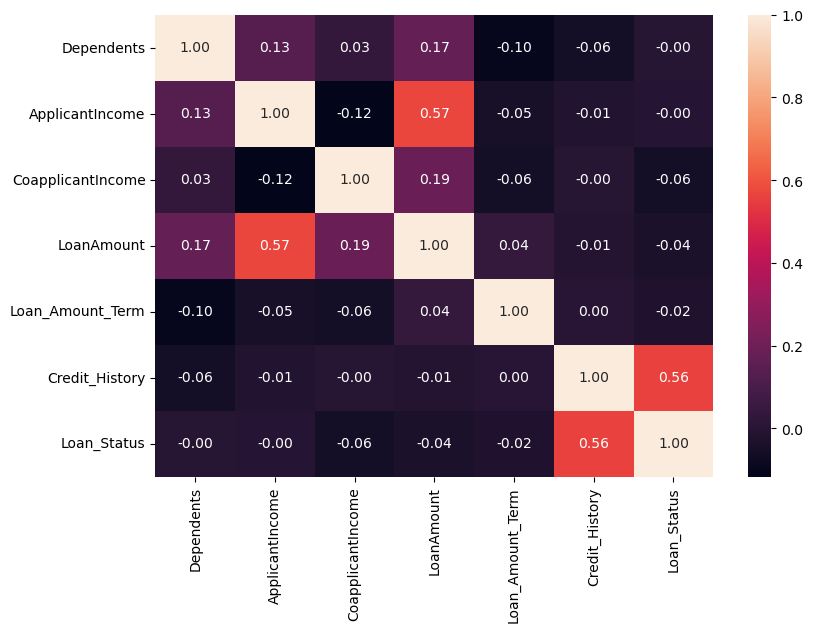

In [250]:
#now we'll look at the correletion between all the numerical variables. we'll use the heat map to visualize the correelation.
#heat maps visualize data through variations in coloring.

# Calculate correlation matrix using only numeric columns
matrix = train_df.select_dtypes(include=['number']).corr()

# Create a heatmap
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, annot=True, fmt=".2f", ax=ax)
plt.show()

### Missing values and Outliers treatment

In [251]:
#next, we'll check for missing values
train_df.isna().sum() 

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

we will treat the missing values in all the features one after the other. we can consider these methods to fill the missing values:

- for numerical variables: imputation using mean or median.
- for categorical variables: imputation using mode.

In [252]:
# There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features, so we can fill them using the mode of the features.

train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Self_Employed'].fillna(train_df['Self_Employed'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)

In [253]:
#let's find a way to fill the missing values in Loan_Amount_Term. We will look at the value counts of the loan amount term variable.

train_df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

it can be seen that in loan amount term variable, the value of 360 is repeated the most. so we will replace the missing values in the variable using the mode of this variable.

In [254]:
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)

- next, we'll see the LoanAmount variable. as it is a numerical value, we can use the mean or median to impute the missing values. we'll use the median to fill the null values, as earlier, we saw that loan amount has outliers, so the mean will not be a proper approach as it is highly affected by the presence of outliers.

In [255]:
train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(), inplace=True)

In [256]:
#let's view for missing values in the dataset 
train_df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

- we can see that all the missing values have been filled in the train dataset. let's fill all the missing values in the test dataset too with the same approach.

In [257]:
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)
test_df['Married'].fillna(test_df['Married'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna(test_df['Self_Employed'].mode()[0], inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)
test_df['LoanAmount'].fillna(test_df['LoanAmount'].median(), inplace=True)

In [258]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 57.7+ KB


## Outlier Treatment

as we saw earlier in univariate analysis, LoanAmount contains outliers, so we have to treat them as the presence of outliers affects the distribution of the data. due to these outliers, bulk of data in the loan amount is at the left and right tail longer, this is called right skewed. one way to remove the skewness is by doing the log transformation. as we take the log transformation, it does not affect the smaller values much, but reduces the larger values. so wwe get a distrribution similiar to the normal distribution.

- the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let's build a Logistic Regression model and make predictions for the test dataset.

In [259]:
Q1 = train_df['LoanAmount'].quantile(0.25)
Q3 = train_df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

train_df=train_df[(train_df['LoanAmount']>lower_bound) & (train_df['LoanAmount']< upper_bound)]

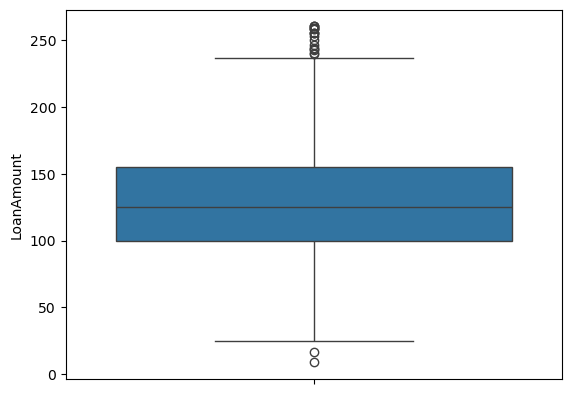

In [260]:
#we'll check for the outliers again
sns.boxplot(train_df['LoanAmount'])
plt.show()

In [261]:
Q1 = test_df['LoanAmount'].quantile(0.25)
Q3 = test_df['LoanAmount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

test_df=test_df[(test_df['LoanAmount']>lower_bound) & (test_df['LoanAmount']< upper_bound)]

In [262]:
train_df.dtypes

Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [263]:
#let's convert categorical columns to numerical values
train_df.replace({
    'Gender': {'Female': 0, 'Male': 1},
    'Married': {'No': 0, 'Yes': 1},
    'Self_Employed': {'No': 0, 'Yes': 1},
    'Education': {'Not Graduate': 0, 'Graduate': 1},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
}, inplace=True)

In [264]:
#let's do the same for test dataset
test_df.replace({
    'Gender': {'Female': 0, 'Male': 1},
    'Married': {'No': 0, 'Yes': 1},
    'Self_Employed': {'No': 0, 'Yes': 1},
    'Education': {'Not Graduate': 0, 'Graduate': 1},
    'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}
}, inplace=True)

In [265]:
train_df.dtypes

Gender                 int64
Married                int64
Dependents           float64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

## Model Building 

In [266]:
#sklearn requires the target variable in a separates dataset. so we will drop our target variable from the train dataset and save it in another dataset.
X=train_df.drop('Loan_Status', axis=1)
y=train_df['Loan_Status']

In [267]:
#let's initialize the logistic regression model and fit the data in it
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
clf=LogisticRegression()

In [269]:
#we'll train the model 
clf.fit(X_train, y_train) 

LogisticRegression()

In [270]:
#let's check the accuracy of the LogisticRegression on training data 
y_pred = clf.predict(X_train)
training_data_accuracy = accuracy_score(y_train, y_pred)
print('Accuracy score of training data:', training_data_accuracy)

Accuracy score of training data: 0.8122270742358079


In [271]:
#let's check the accuracy of the LogisticRegression on test data 
y_pred = clf.predict(X_test)
test_data_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.8347826086956521


## Hyperparameter Tuning

In [272]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [1000]
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print(f"Best parameters: {grid_search.best_params_}")
y_pred = best_model.predict(X_test)
print(f"Improved accuracy: {accuracy_score(y_test, y_pred)}")

Best parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
Improved accuracy: 0.8347826086956521


these results show hyperparameter tuning didn't improve the model's performance, for some reasons which may include dataset limitations.

In [273]:
# Save the model to a file
import pickle
with open('loan_model.pkl', 'wb') as file:
    pickle.dump(clf, file)